In [1]:
from rasterio.windows import Window
from scipy.ndimage import median_filter
from mantle_utils.alg.raster import Raster
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

Prepares data, band 08,04,03 in RGB Band 04,03,02
Net bands 8,4,3,2

In [8]:
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2021-12-31')
df08 = pd.read_pickle('./namelist/s2_08.pkl')
df08['start_datetime'] = pd.to_datetime(df08['start_datetime'])
df04 = pd.read_pickle('./namelist/s2_04.pkl')
df04['start_datetime'] = pd.to_datetime(df04['start_datetime'])
df03 = pd.read_pickle('./namelist/s2_03.pkl')
df03['start_datetime'] = pd.to_datetime(df03['start_datetime'])
df02 = pd.read_pickle('./namelist/s2_02.pkl')
df02['start_datetime'] = pd.to_datetime(df02['start_datetime'])
date08 = sorted(list(set(df08['start_datetime'].values)))
date04 = sorted(list(set(df04['start_datetime'].values)))
date03 = sorted(list(set(df03['start_datetime'].values)))
date02 = sorted(list(set(df02['start_datetime'].values)))
size = [80,50]
window = Window(col_off=100, row_off=200, width=size[0], height=size[1])
ip08 = []
ip04 = []
ip03 = []
ip02 = []

Preparing Band 08

In [9]:
for start_datetime_np in date08:
    geotiff_path = df08.loc[df08['start_datetime'] == start_datetime_np]['raster_path'].values[0]
    partial_raster = Raster(geotiff_path, window=window)
    temp = partial_raster.array.reshape(size[1],size[0])
    temp = median_filter(temp, size=3)
    ip08.append(temp)
ip08 = np.array(ip08)

In [10]:
for start_datetime_np in date04:
    geotiff_path = df04.loc[df04['start_datetime'] == start_datetime_np]['raster_path'].values[0]
    partial_raster = Raster(geotiff_path, window=window)
    temp = partial_raster.array.reshape(size[1],size[0])
    temp = median_filter(temp, size=3)
    ip04.append(temp)
ip04 = np.array(ip04)

In [11]:
for start_datetime_np in date03:
    geotiff_path = df03.loc[df03['start_datetime'] == start_datetime_np]['raster_path'].values[0]
    partial_raster = Raster(geotiff_path, window=window)
    temp = partial_raster.array.reshape(size[1],size[0])
    temp = median_filter(temp, size=3)
    ip03.append(temp)
ip03 = np.array(ip03)

In [12]:
for start_datetime_np in date02:
    geotiff_path = df02.loc[df02['start_datetime'] == start_datetime_np]['raster_path'].values[0]
    partial_raster = Raster(geotiff_path, window=window)
    temp = partial_raster.array.reshape(size[1],size[0])
    temp = median_filter(temp, size=3)
    ip02.append(temp)
ip02 = np.array(ip02)

In [13]:
ip08[ip08 != 0]
ip04[ip04 != 0]
ip03[ip03 != 0]
ip02[ip02 != 0]
np.save('./namelist/b08.npy',ip08)
np.save('./namelist/b04.npy',ip04)
np.save('./namelist/b03.npy',ip03)
np.save('./namelist/b02.npy',ip02)

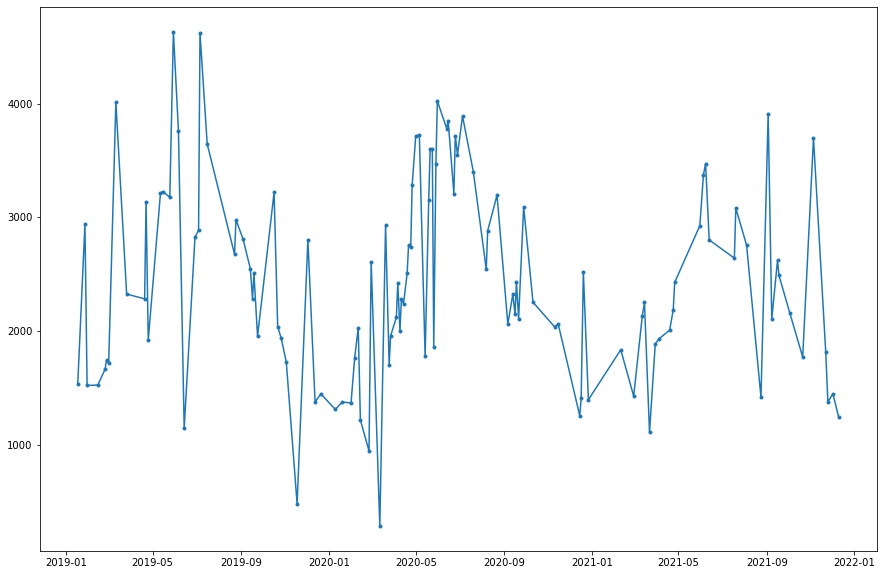

In [6]:
df25_16_08 = pd. DataFrame({'dates':date08,'data':b08_25_16}, columns=['dates','data'])

df25_16_08.set_index('dates',inplace=True)
df25_16_08.index=pd.to_datetime(df25_16_08.index)
plt.figure(figsize=(15,10))
plt.plot(df25_16_08.index,df25_16_08['data'],  linestyle='-',marker='.')

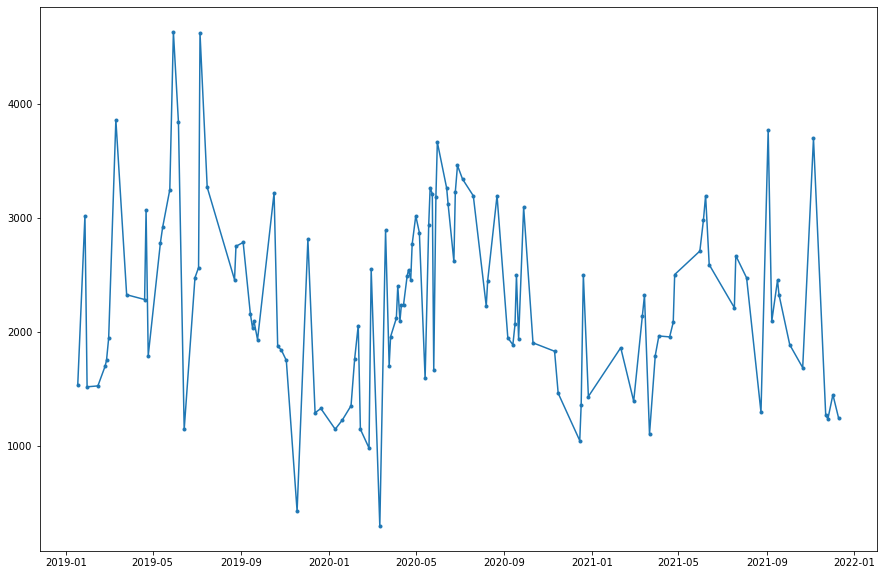

In [37]:
df25_16_08 = pd. DataFrame({'dates':date08,'data':b08_25_16}, columns=['dates','data'])
df25_16_08.dropna(inplace=True)
df25_16_08.set_index('dates',inplace=True)
df25_16_08.index=pd.to_datetime(df25_16_08.index)
plt.figure(figsize=(15,10))
plt.plot(df25_16_08.index,df25_16_08['data'],  linestyle='-',marker='.')

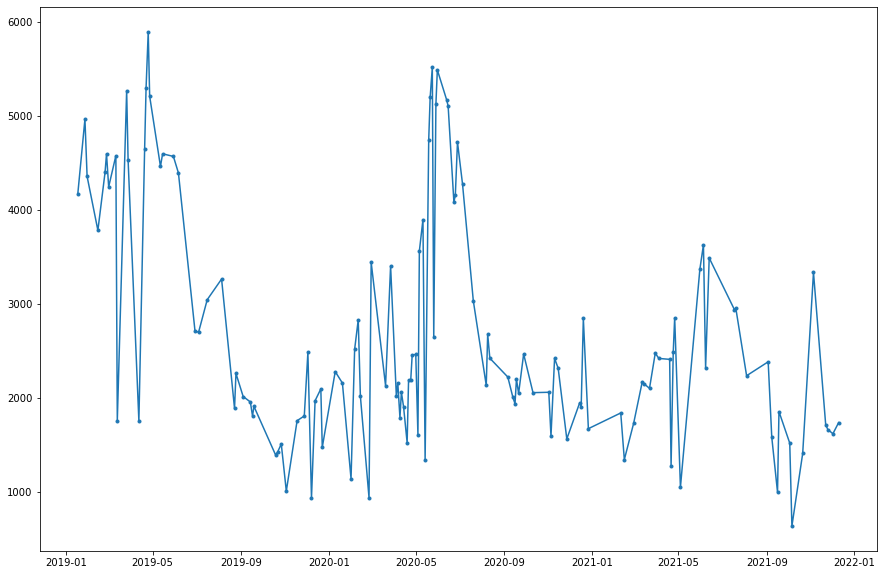

In [7]:

df45_32_08 = pd. DataFrame({'dates':date08,'data':b08_45_32}, columns=['dates','data'])
df45_32_08.dropna(inplace=True)
df45_32_08.set_index('dates',inplace=True)
df45_32_08.index=pd.to_datetime(df45_32_08.index)
plt.figure(figsize=(15,10))
plt.plot(df45_32_08.index,df45_32_08['data'],  linestyle='-',marker='.')
plt.show()

Preparing Band 04

In [8]:
for start_datetime_np in date04:
    geotiff_path = df04.loc[df04['start_datetime'] == start_datetime_np]['raster_path'].values[0]
    partial_raster = Raster(geotiff_path, window=window)
    temp = partial_raster.array.reshape(size[1],size[0])
    ip04.append(temp)
ip04 = np.array(ip04)
b04_45_32 = ip04[:,45,32]
b04_45_32 = b04_45_32.astype('float')
b04_45_32[b04_45_32 == 0] = 'nan'
b04_25_16 = ip04[:,25,16]
b04_25_16 = b04_25_16.astype('float')
b04_25_16[b04_25_16 == 0] = 'nan'

              data
dates             
2019-01-17   339.0
2019-01-27  1021.0
2019-01-30   396.0
2019-02-14   419.0
2019-02-24   458.0


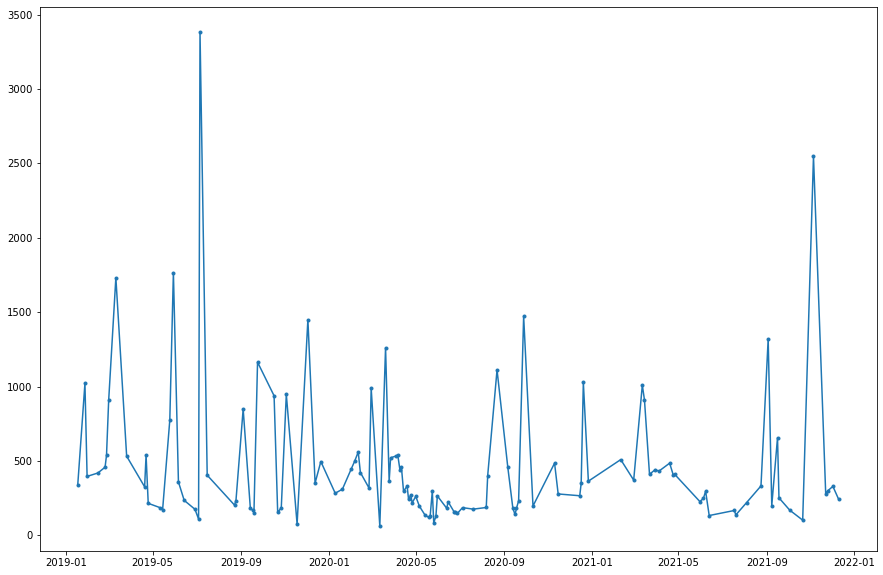

In [39]:
df25_16_04 = pd. DataFrame({'dates':date04,'data':b04_25_16}, columns=['dates','data'])
df25_16_04.dropna(inplace=True)
df25_16_04.set_index('dates',inplace=True)
df25_16_04.index=pd.to_datetime(df25_16_04.index)
plt.figure(figsize=(15,10))
plt.plot(df25_16_04.index,df25_16_04['data'],  linestyle='-',marker='.')
print(df25_16_04.head())

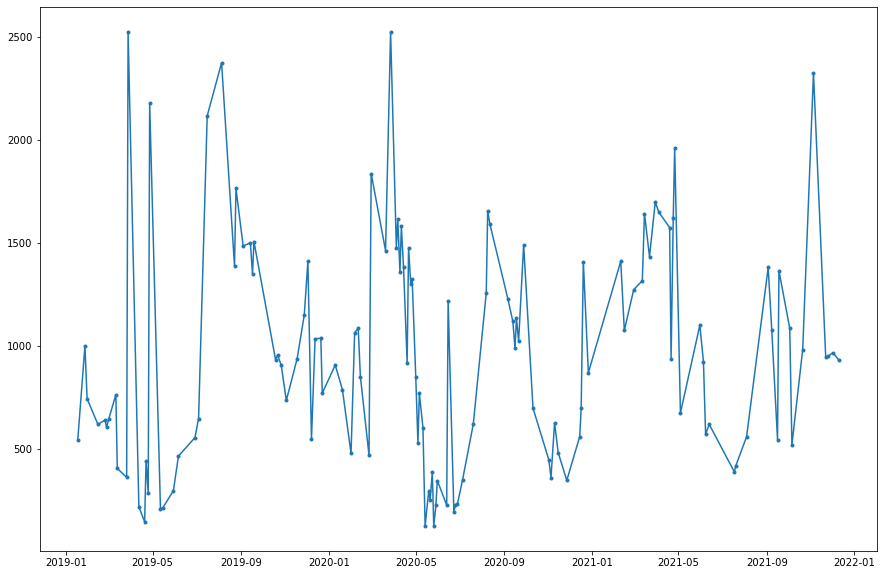

In [40]:
df45_32_04 = pd. DataFrame({'dates':date04,'data':b04_45_32}, columns=['dates','data'])
df45_32_04.dropna(inplace=True)
df45_32_04.set_index('dates',inplace=True)
df45_32_04.index=pd.to_datetime(df45_32_04.index)
plt.figure(figsize=(15,10))
plt.plot(df45_32_04.index,df45_32_04['data'],  linestyle='-',marker='.')

Preparing Band 03

In [11]:
for start_datetime_np in date03:
    geotiff_path = df03.loc[df03['start_datetime'] == start_datetime_np]['raster_path'].values[0]
    partial_raster = Raster(geotiff_path, window=window)
    temp = partial_raster.array.reshape(size[1],size[0])
    ip03.append(temp)
ip03 = np.array(ip03)
b03_45_32 = ip03[:,45,32]
b03_45_32 = b03_45_32.astype('float')
b03_45_32[b03_45_32 == 0] = 'nan'
b03_25_16 = ip03[:,25,16]
b03_25_16 = b03_25_16.astype('float')
b03_25_16[b03_25_16 == 0] = 'nan'

             data
dates            
2019-01-17  244.0
2019-01-27  930.0
2019-01-30  297.0
2019-02-14  323.0
2019-02-24  410.0


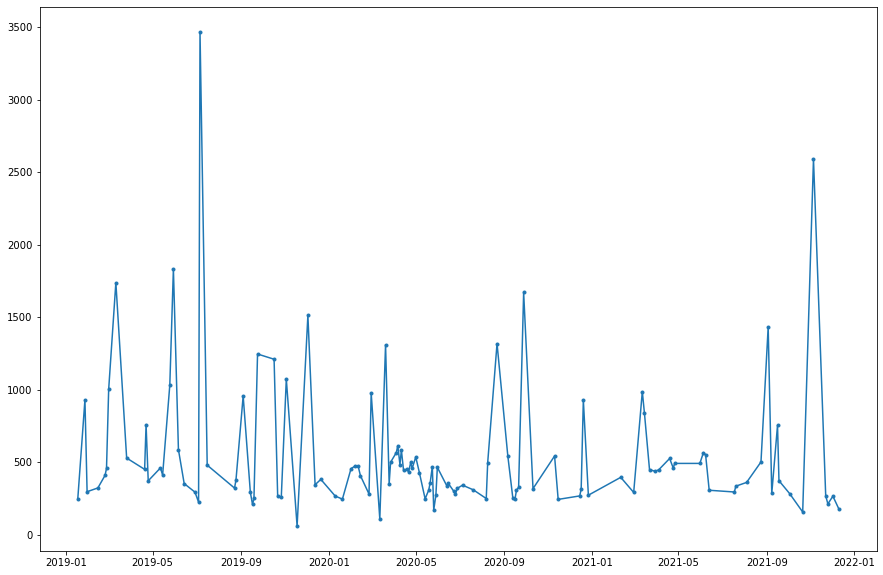

In [42]:
df25_16_03 = pd. DataFrame({'dates':date03,'data':b03_25_16}, columns=['dates','data'])
df25_16_03.dropna(inplace=True)
df25_16_03.set_index('dates',inplace=True)
df25_16_03.index=pd.to_datetime(df25_16_03.index)
plt.figure(figsize=(15,10))
plt.plot(df25_16_03.index,df25_16_03['data'],  linestyle='-',marker='.')
print(df25_16_03.head())

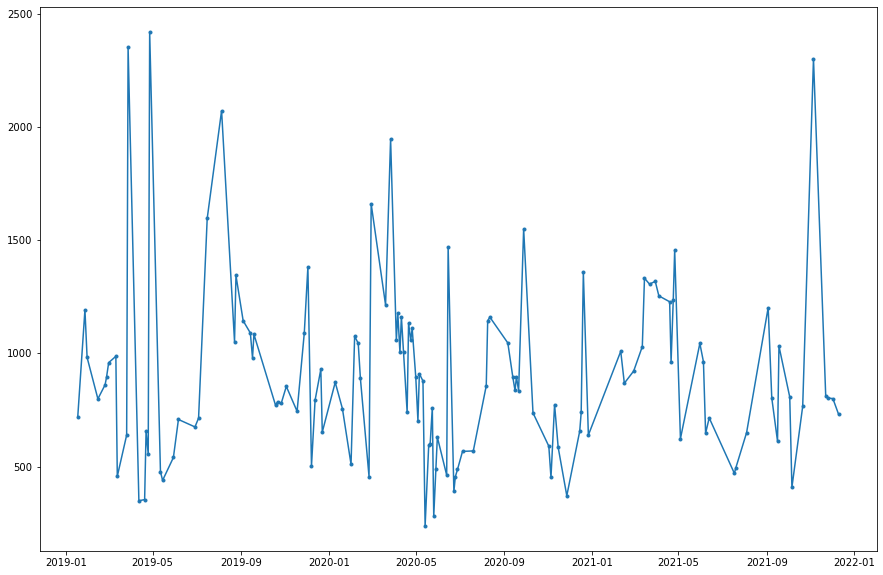

In [43]:
df45_32_03 = pd. DataFrame({'dates':date03,'data':b03_45_32}, columns=['dates','data'])
df45_32_03.dropna(inplace=True)
df45_32_03.set_index('dates',inplace=True)
df45_32_03.index=pd.to_datetime(df45_32_03.index)
plt.figure(figsize=(15,10))
plt.plot(df45_32_03.index,df45_32_03['data'],  linestyle='-',marker='.')

In [14]:
for start_datetime_np in date02:
    geotiff_path = df02.loc[df02['start_datetime'] == start_datetime_np]['raster_path'].values[0]
    partial_raster = Raster(geotiff_path, window=window)
    temp = partial_raster.array.reshape(size[1],size[0])
    ip02.append(temp)
ip02 = np.array(ip02)
b02_45_32 = ip02[:,45,32]
b02_45_32 = b02_45_32.astype('float')
b02_45_32[b02_45_32 == 0] = 'nan'
b02_25_16 = ip02[:,25,16]
b02_25_16 = b02_25_16.astype('float')
b02_25_16[b02_25_16 == 0] = 'nan'

             data
dates            
2019-01-17  221.0
2019-01-27  879.0
2019-01-30  271.0
2019-02-14  134.0
2019-02-24  281.0


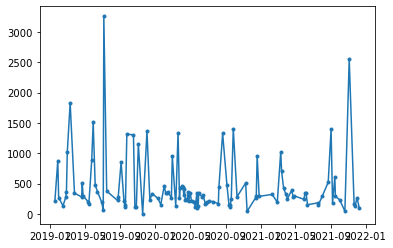

In [15]:
df25_16_02 = pd. DataFrame({'dates':date02,'data':b02_25_16}, columns=['dates','data'])
df25_16_02.dropna(inplace=True)
df25_16_02.set_index('dates',inplace=True)
df25_16_02.index=pd.to_datetime(df25_16_02.index)
plt.plot(df25_16_02.index,df25_16_02['data'],  linestyle='-',marker='.')
print(df25_16_02.head())

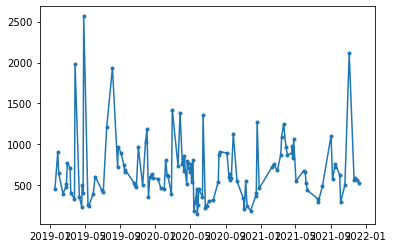

In [16]:
df45_32_02 = pd. DataFrame({'dates':date03,'data':b02_45_32}, columns=['dates','data'])
df45_32_02.dropna(inplace=True)
df45_32_02.set_index('dates',inplace=True)
df45_32_02.index=pd.to_datetime(df45_32_02.index)
plt.plot(df45_32_02.index,df45_32_02['data'],  linestyle='-',marker='.')

In [44]:
from statsmodels.tsa.seasonal import STL

In [77]:
df45_32_02.size

129

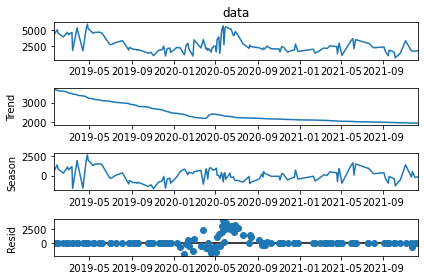

In [84]:
stl = STL(df45_32_08['data'], period =42, robust = True)
res = stl.fit()
fig = res.plot()

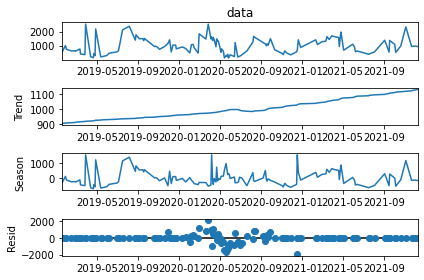

In [85]:
stl = STL(df45_32_04['data'], period =42, robust = True)
res = stl.fit()
fig = res.plot()

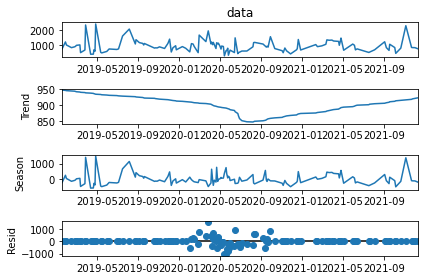

In [86]:
stl = STL(df45_32_03['data'], period =42, robust = True)
res = stl.fit()
fig = res.plot()

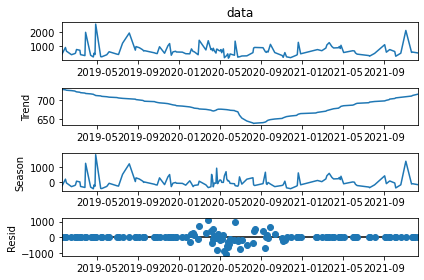

In [87]:
stl = STL(df45_32_02['data'], period =42, robust = True)
res = stl.fit()
fig = res.plot()

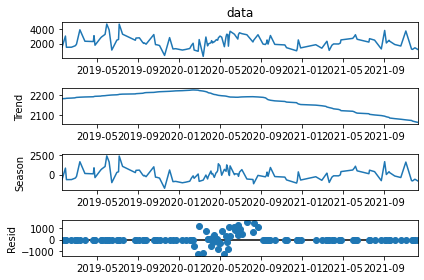

In [88]:
stl = STL(df25_16_08['data'], period =42, robust = True)
res = stl.fit()
fig = res.plot()

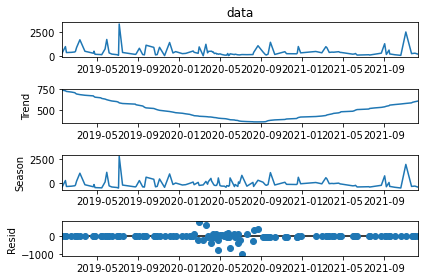

In [91]:
stl = STL(df25_16_04['data'], period =42, robust = True)
res = stl.fit()
fig = res.plot()

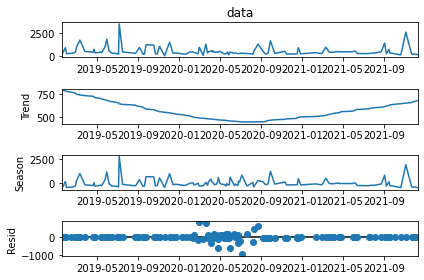

In [92]:
stl = STL(df25_16_03['data'], period =42, robust = True)
res = stl.fit()
fig = res.plot()

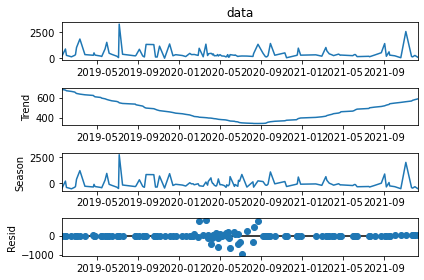

In [93]:
stl = STL(df25_16_02['data'], period =42, robust = True)
res = stl.fit()
fig = res.plot()

In [3]:
from scipy.ndimage import gaussian_filter
import numpy as np
import seaborn as sns; sns.set_theme()

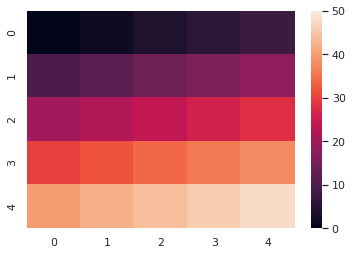

In [6]:
a = np.arange(50, step=2).reshape((5,5))
sns.heatmap(a,vmin=0, vmax=50)

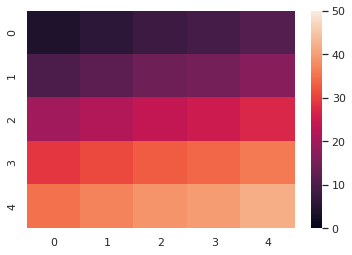

In [7]:
b = gaussian_filter(a, sigma=1)
sns.heatmap(b,vmin=0, vmax=50)

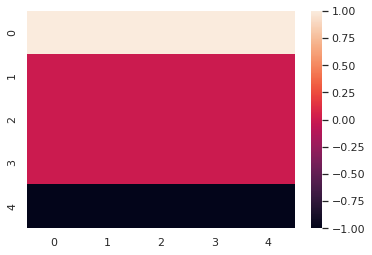

In [9]:
from scipy import ndimage
result = ndimage.gaussian_laplace(a, sigma=3)
sns.heatmap(result)